In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
warnings.filterwarnings('ignore')

In [100]:
df = pd.read_csv("num_df.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 22 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   pickup_longitude    1458644 non-null  float64
 1   pickup_latitude     1458644 non-null  float64
 2   dropoff_longitude   1458644 non-null  float64
 3   dropoff_latitude    1458644 non-null  float64
 4   store_and_fwd_flag  1458644 non-null  int64  
 5   trip_duration       1458644 non-null  int64  
 6   hour                1458644 non-null  int64  
 7   day                 1458644 non-null  int64  
 8   weekday             1458644 non-null  int64  
 9   month               1458644 non-null  int64  
 10  year                1458644 non-null  int64  
 11  weekend             1458644 non-null  int64  
 12  haversine_km        1458644 non-null  float64
 13  plat                1458644 non-null  float64
 14  plon                1458644 non-null  float64
 15  dlat           

In [101]:
df.isnull().sum()

,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
store_and_fwd_flag,0
trip_duration,0
hour,0
day,0
weekday,0
month,0


In [102]:
df.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,hour,day,weekday,month,...,haversine_km,plat,plon,dlat,dlon,manhattan_km,bearing,is_zero_distance,pickup_cluster,dropoff_cluster
0,-73.982155,40.767937,-73.964630,40.765602,0,455,17,14,0,3,...,1.498521,40.767937,-73.982155,40.765602,-73.964630,1.735459,99.970196,False,0,8
1,-73.980415,40.738564,-73.999481,40.731152,0,663,0,12,6,6,...,1.805507,40.738564,-73.980415,40.731152,-73.999481,2.430596,242.846232,False,0,9
2,-73.979027,40.763939,-74.005333,40.710087,0,2124,11,19,1,1,...,6.385098,40.763939,-73.979027,40.710087,-74.005333,8.204472,200.319835,False,0,9
3,-74.010040,40.719971,-74.012268,40.706718,0,429,19,6,2,4,...,1.485498,40.719971,-74.010040,40.706718,-74.012268,1.661350,187.262300,False,4,9
4,-73.973053,40.793209,-73.972923,40.782520,0,435,13,26,5,3,...,1.188588,40.793209,-73.973053,40.782520,-73.972923,1.199458,179.473585,False,3,8


Text(0.5, 1.0, 'Correlation Matrix')

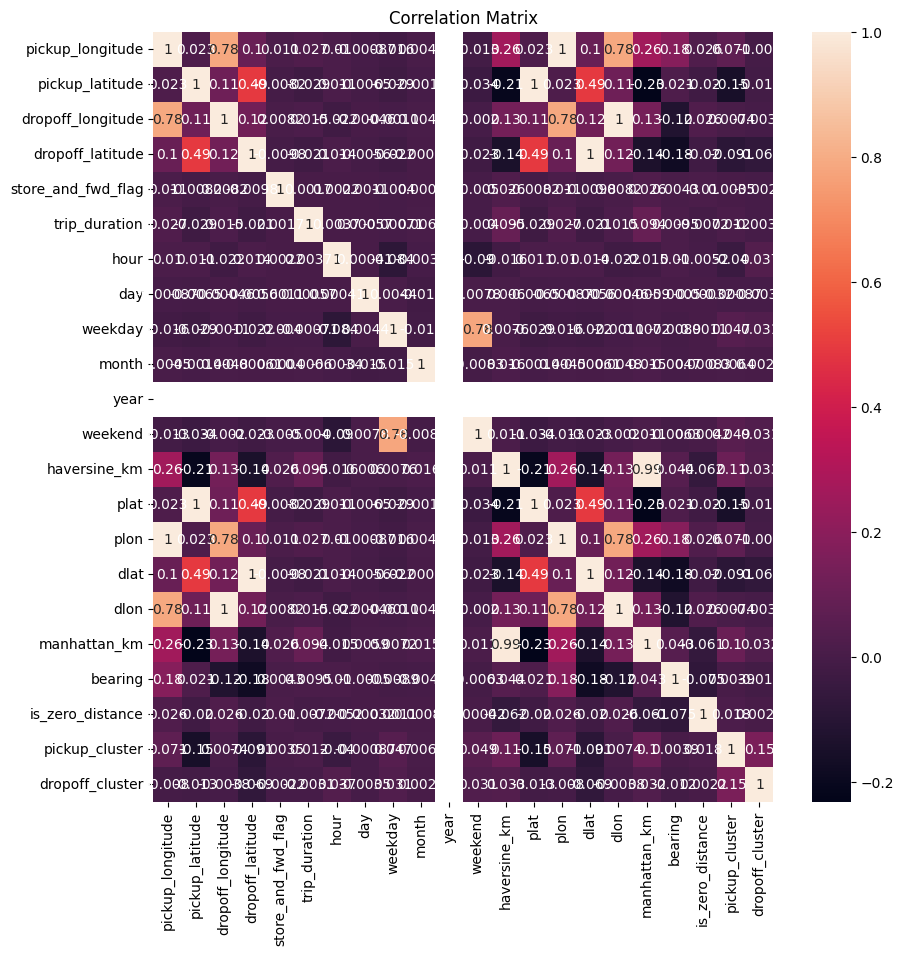

In [103]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Matrix")

In [104]:
num_feat = []
cate_feat = []
datetime_feat = []

for col in df.columns:
    dtype = df[col].dtype
    if pd.api.types.is_numeric_dtype(dtype):
        num_feat.append(col)
    elif pd.api.types.is_categorical_dtype(dtype) or pd.api.types.is_object_dtype(dtype):
        cate_feat.append(col)
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        datetime_feat.append(col)

print("Numerical Features:", num_feat)
print("Categorical Features:", cate_feat)
print("Datetime Features:", datetime_feat)

Numerical Features: ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration', 'hour', 'day', 'weekday', 'month', 'year', 'weekend', 'haversine_km', 'plat', 'plon', 'dlat', 'dlon', 'manhattan_km', 'bearing', 'is_zero_distance', 'pickup_cluster', 'dropoff_cluster']
Categorical Features: []
Datetime Features: []


In [105]:
feature_col = [
    'hour',
    'day',
    'weekday',
    'weekend',
    'month',
    'year',
    'plat',
    'plon',
    'dlat',
    'dlon',
    'store_and_fwd_flag',
    'manhattan_km',
    'bearing'
]
x_train = df[feature_col]
y_train = df['trip_duration']
y_train_log = np.log1p(y_train)

In [106]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(x_train,y_train_log, test_size = 0.01, random_state = 42)

In [107]:
y_train_log = np.log1p(y_train)


In [108]:
# import os
# os.environ["TQDM_NOTEBOOK"] = "false"

In [109]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


In [ ]:
import xgboost as xgb
model = xgb.XGBRegressor (
    n_estimators = 500,
    learning_rate = 0.1,
    max_depth = 7,
    subsample = 0.8,
    colsample_bytree = 0.8,
    random_state = 42,
    n_jobs = -1,
)
model.fit(x_tr,y_tr)

In [ ]:
from sklearn.metrics import mean_squared_log_error

y_val_pred_log = model.predict(x_val)
y_val_pred = np.expm1(y_val_pred_log)
y_val_true = np.expm1(y_val)

rmsle = np.sqrt(mean_squared_log_error(y_val_true, y_val_pred))
print(rmsle)

In [ ]:
test_df = pd.read_csv('test.csv')
test_df.head()

In [ ]:
test_df['pickup_datetime'] = pd.to_datetime(test_df['pickup_datetime'])
test_df['hour'] = test_df['pickup_datetime'].dt.hour
test_df['day'] = test_df['pickup_datetime'].dt.day
test_df['weekday'] = test_df['pickup_datetime'].dt.weekday
test_df['month'] = test_df['pickup_datetime'].dt.month
test_df['year'] = test_df['pickup_datetime'].dt.year
test_df['weekend'] = test_df['weekday'].isin([5,6]).astype(int)

In [ ]:
def haversine(latitude1, longitude1, latitude2, longitude2) :
    phi1 = np.radians(latitude1)
    phi2 = np.radians(latitude2)
    delta_phi = np.radians(latitude2 - latitude1)
    delta_lamda = np.radians(longitude2 - longitude1)
    a = np.sin(delta_phi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lamda/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return 6371 * c

In [ ]:
def manhattan(latitude1, longitude1, latitude2, longitude2) :
    dlat = np.abs(latitude2 - latitude1)
    dlon = np.abs(longitude2 - longitude1)
    lat_km = np.radians(dlat) * 6371
    lon_km = np.radians(dlon) * 6371 * np.cos(np.radians((latitude1 + latitude2)/2))
    return lat_km + lon_km

In [ ]:
def bearing(lat1, lon1, lat2, lon2):
    delta_lon = np.radians(lon2 - lon1)
    lat1 = np.radians(lat1)
    lat2 = np.radians(lat2)

    x = np.sin(delta_lon) * np.cos(lat2)
    y = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(delta_lon)

    bearing = np.arctan2(x, y)
    bearing = np.degrees(bearing)

    return (bearing + 360) % 360

In [ ]:
test_df['plat'] = test_df['pickup_latitude']
test_df['plon'] = test_df['pickup_longitude']
test_df['dlat'] = test_df['dropoff_latitude']
test_df['dlon'] = test_df['dropoff_longitude']
test_df['distance_km'] = haversine(test_df['plat'],test_df['plon'],test_df['dlat'],test_df['dlon'])
test_df['manhattan_km'] = manhattan(test_df['plat'],test_df['plon'],test_df['dlat'],test_df['dlon'])
test_df['bearing'] = bearing(test_df['plat'],test_df['plon'],test_df['dlat'],test_df['dlon'])
test_df['store_and_fwd_flag'] = test_df['store_and_fwd_flag'].map({'N': 0,'Y' : 1})

In [ ]:
feature_col = [
    'hour',
    'day',
    'weekday',
    'weekend',
    'month',
    'year',
    'plat',
    'plon',
    'dlat',
    'dlon',
    'store_and_fwd_flag',
    'manhattan_km',
    'bearing'
]
x_test = test_df[feature_col]

In [ ]:
y_test_pred_log = model.predict(x_test)
y_test_pred = np.expm1(y_test_pred_log)

In [ ]:
submission = pd.DataFrame ({
    'id' : test_df['id'],
    'trip_duration' : y_test_pred
})
submission.to_csv('xgboost.csv',index = False)

In [ ]:
submission